# Data import and initial Exloration


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# data = pd.read_excel('/content/minisample_500.xlsx')
data = pd.read_csv('/content/lc_loan.csv')
# data = data[:100000]
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

In [11]:
test_data = pd.read_csv('/content/lc_loan_test.csv')
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

In [12]:
set(data.columns)-set(test_data.columns)

{'early_default', 'loan_status', 'return'}

In [13]:
data = data.drop(columns=['id','zip_code','issue_d','earliest_cr_line', 'purpose', 'early_default'])
test_data = test_data.drop(columns=['id','zip_code','issue_d','earliest_cr_line', 'purpose',])

In [14]:
# prompt: no of rows and columns

print(data.shape)
print(test_data.shape)


(933160, 31)
(112858, 29)


In [15]:
  # Summary statistics
summary_stats = data.describe()
print(summary_stats)

           loan_amnt    funded_amnt       int_rate    installment  \
count  933160.000000  933160.000000  933160.000000  933160.000000   
mean    12559.115559   12555.207923       0.119775     416.318741   
std      8042.750083    8041.765370       0.039952     268.816718   
min       500.000000     500.000000       0.053200      14.010000   
25%      6425.000000    6400.000000       0.089000     215.630000   
50%     10000.000000   10000.000000       0.115300     339.310000   
75%     16275.000000   16200.000000       0.143300     549.940000   
max     40000.000000   40000.000000       0.309900    1584.900000   

         annual_inc            dti    delinq_2yrs  fico_range_low  \
count  9.331600e+05  933160.000000  933160.000000   933160.000000   
mean   7.412200e+04      17.833822       0.331903      695.139858   
std    6.938399e+04       8.377159       0.899913       31.359123   
min    3.000000e+03      -1.000000       0.000000      660.000000   
25%    4.400000e+04      11.52000

In [16]:
data.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,return
0,5000.0,5000.0,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,0.837,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.172631
1,2400.0,2400.0,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,0.985,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.252361
2,10000.0,10000.0,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,0.210,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.223189
3,5000.0,5000.0,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,0.283,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.126442
4,3000.0,3000.0,0.1864,109.43,E,E1,9 years,RENT,48000.0,Source Verified,...,0.875,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.313045


# Data Cleaning and preprocessing

In [17]:
# # Drop the 'mths_since_last_delinq' column since missing ~50%
# data = data.drop('mths_since_last_delinq', axis=1)

In [18]:
# prompt: do median for missing values of  mths_since_last_delinq

# Calculate the median of 'mths_since_last_delinq'
median_mths_since_last_delinq = data['mths_since_last_delinq'].median()

# Fill missing values with the median
data['mths_since_last_delinq'].fillna(median_mths_since_last_delinq, inplace=True)


<ipython-input-18-5cadbd22541f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mths_since_last_delinq'].fillna(median_mths_since_last_delinq, inplace=True)


In [19]:
import numpy as np
import pandas as pd

# Function to convert emp_length to numeric values
def convert_emp_length(emp_length):
    if pd.isnull(emp_length):  # Handle NaN values
        return np.nan
    emp_length = str(emp_length)  # Convert to string to avoid AttributeError
    if emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    elif emp_length.isdigit():  # Directly return if it's already a number
        return int(emp_length)
    else:
        return int(emp_length.split()[0])  # Extract the numeric part if formatted as "X years"

# Apply the conversion function to the emp_length column
data['emp_length'] = data['emp_length'].apply(convert_emp_length)
test_data['emp_length'] = test_data['emp_length'].apply(convert_emp_length)

# Fill missing values using the median
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)
test_data['emp_length'].fillna(test_data['emp_length'].median(), inplace=True)

# Example loan status conversion (modify if your labels are different)
loan_status_mapping = {
    "Fully Paid": 0,
    "Charged Off": 1,
    "Default": 1,  # Optional: If your dataset has "Default" status, treat it as Charged Off
    "Late (31-120 days)": 1,  # Optional: Consider these as high-risk loans
}

# Convert loan_status column
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

# Drop rows where loan_status is still NaN (if there were any unmapped values)
data.dropna(subset=['loan_status'], inplace=True)

# Verify conversion
print(data['loan_status'].value_counts())


# Check results
print(data['emp_length'].head())
print("Missing values after filling:", data['emp_length'].isnull().sum())


<ipython-input-19-6bc3df4ee754>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].fillna(data['emp_length'].median(), inplace=True)
<ipython-input-19-6bc3df4ee754>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

loan_status
0    797918
1    135242
Name: count, dtype: int64
0    10.0
1    10.0
2    10.0
3     3.0
4     9.0
Name: emp_length, dtype: float64
Missing values after filling: 0


In [20]:
# prompt: find the missing values of the columns

data.isnull().sum()


,0
loan_amnt,0
funded_amnt,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [21]:
test_data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [22]:
# # Drop the 'mths_since_last_delinq' column since missing ~50% for test file
# test_data = test_data.drop('mths_since_last_delinq', axis=1)

In [23]:

# If 'loan_status' is categorical (e.g., "Fully Paid", "Charged Off"):
loan_status_counts = data['loan_status'].value_counts().nlargest(10) # Get top 10
loan_status_counts


,count
loan_status,
0,797918
1,135242


In [24]:
data['emp_length'].isnull().sum() #imp length checking nun values


np.int64(0)

In [25]:
# Interaction between emp_length and annual_inc
data['fico_avg'] = (data['fico_range_low'] + data['fico_range_high']) / 2
# data.drop(colummns=['emp_length', 'annual_inc'], inplace=True)

# # Nonlinear term: loan_amnt squared
# data['loan_amnt_squared'] = data['loan_amnt'] ** 2
# # data.drop(columns=['loan_amnt'], inplace=True)

# Nonlinear term: loan_amnt squared
# Convert 'loan_amnt' to numeric before applying the power operation
data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')  # Handle potential errors
data['loan_amnt_squared'] = data['loan_amnt'] ** 2
# data.drop(columns=['loan_amnt'], inplace=True)


# Feature engineering

In [26]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
data['grade'] = label_encoder.fit_transform(data['grade'])
data['sub_grade'] = label_encoder.fit_transform(data['sub_grade'])
data['emp_length'] = label_encoder.fit_transform(data['emp_length'])


# One-hot encoding for categorical variables
for col in ['home_ownership', 'verification_status','addr_state','loan_status']:
    data[col] = label_encoder.fit_transform(data[col])

In [27]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'inq_last_6mths', 'open_acc','mths_since_last_delinq',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
    'tax_liens', 'fico_range_low', 'fico_range_high',
]

# Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [28]:
data.columns
data.shape

(933160, 33)

# ENCODING FOR TEST DATA

In [29]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
test_data['grade'] = label_encoder.fit_transform(test_data['grade'])
test_data['sub_grade'] = label_encoder.fit_transform(test_data['sub_grade'])
test_data['emp_length'] = label_encoder.fit_transform(test_data['emp_length'])

# One-hot encoding for categorical variables
for col in ['home_ownership', 'verification_status','addr_state']:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [30]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'inq_last_6mths', 'open_acc','mths_since_last_delinq',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
    'tax_liens', 'fico_range_low', 'fico_range_high',
]

# Standardize numerical features
scaler = StandardScaler()
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])

In [31]:
test_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year'],
      dtype='object')

In [32]:
test_data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [33]:
# prompt: write a code to check the high correlating veriables with respect to reutrn

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation with 'return'
correlation_with_return = correlation_matrix['return'].drop('return')  # Exclude self-correlation

# Sort by absolute correlation magnitude
sorted_correlation = correlation_with_return.abs().sort_values(ascending=False)

# Print or visualize the highly correlated variables
print("Variables highly correlated with 'return':")
print(sorted_correlation)

# You can set a threshold to filter highly correlated variables
threshold = 0.1  # Example threshold
highly_correlated_variables = sorted_correlation[sorted_correlation > threshold]
print(f"\nVariables with correlation above {threshold}:")
highly_correlated_variables


Variables highly correlated with 'return':
loan_status                   0.849922
year                          0.063327
dti                           0.039181
revol_util                    0.036785
inq_last_6mths                0.034340
home_ownership                0.030214
open_acc                      0.025659
verification_status           0.024495
grade                         0.023567
total_acc                     0.023374
sub_grade                     0.022923
pub_rec_bankruptcies          0.019274
revol_bal                     0.014911
emp_length                    0.014714
installment                   0.012515
int_rate                      0.012197
annual_inc                    0.011985
pub_rec                       0.011049
loan_amnt                     0.009713
funded_amnt                   0.009710
addr_state                    0.008324
fico_range_low                0.007711
fico_avg                      0.007711
fico_range_high               0.007711
collections_12_mths_e

,return
loan_status,0.849922


# Linear regression model

1.   Data: Train and validation
2.   test_data : testing



In [34]:
# prompt: expanding-window regularly
# updating training and validation sets. You need to justify why you chose either approach.



import pandas as pd
from sklearn.model_selection import train_test_split
# ... (your existing code) ...


# Function to create training and validation sets with an expanding window
def expanding_window_split(data, train_size):
    data_size = len(data)
    train_index = int(train_size * data_size)

    y = data['return']
    X = data.drop(['return', 'loan_status'], axis=1)  # Features
    # y = data[['return',]]  # Target variable

    X_train = X.iloc[:train_index]
    X_val = X.iloc[train_index:]
    y_train = y.iloc[:train_index]
    y_val = y.iloc[train_index:]

    return X_train, X_val, y_train, y_val

# Example usage:
train_size_ratio = 0.8 #Example
X_train, X_val, y_train, y_val = expanding_window_split(data, train_size_ratio)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (746528, 31)
Validation data shape: (186632, 31)


In [35]:
# prompt: run simple regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ensure X_train_return is properly initialized
X_train_return, y_train_return = X_train.copy(), y_train
X_val_return, y_val_return = X_val.copy(), y_val


# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Make predictions on the training data
y_pred_train = lr_model.predict(X_train)

# Calculate the R-squared for the training data
r2_train = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"In-sample R-squared: {r2_train}")
print(f"Out-of-sample R-squared: {r2}")


Mean Squared Error: 0.06910539884495703
R-squared: 0.0053510546289327054
In-sample R-squared: 0.012896803865904194
Out-of-sample R-squared: 0.0053510546289327054


In [36]:
# test_data = pd.read_csv('lc_loan_test.csv')
# Display first few rows
print("Test Dataset Shape:", test_data.shape)

test_data['fico_avg'] = (test_data['fico_range_low'] + test_data['fico_range_high']) / 2

# Nonlinear term: loan_amnt squared
test_data['loan_amnt_squared'] = test_data['loan_amnt'] ** 2
# data.drop(columns=['loan_amnt'], inplace=True)


# test_data = test_data[X_train.columns]

Test Dataset Shape: (112858, 29)


# Logistic Regression

In [37]:


import pandas as pd
from sklearn.model_selection import train_test_split

# Function to create training and validation sets with an expanding window
def expanding_window_split(data, train_size):
    data_size = len(data)
    train_index = int(train_size * data_size)

    y_l= data[['return']]  # Target variable
    X_l= data.drop(['return', 'loan_status'], axis=1)  # Features
    # y_l = data['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)  # Binary classification
    # test_size=0.2,  # Adjust as needed
    # random_state=42,

    X_l_train = X_l.iloc[:train_index]
    X_l_val = X_l.iloc[train_index:]
    y_l_train = y_l.iloc[:train_index]
    y_l_val = y_l.iloc[train_index:]

    return X_l_train, X_l_val, y_l_train, y_l_val

# Example usage:
train_size_ratio = 0.8 #Example
X_l_train, X_l_val, y_l_train, y_l_val = expanding_window_split(data, train_size_ratio)

print(f"Training data shape: {X_l_train.shape}")
print(f"Validation data shape: {X_l_val.shape}")


Training data shape: (746528, 31)
Validation data shape: (186632, 31)


In [38]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_l_train_resampled, y_l_train_resampled = smote.fit_resample(X_l_train, data['loan_status'][:len(X_l_train)])
# X_l_val_resampled, y_l_val_resampled = smote.fit_resample(X_l_val, y_l_val)

print("Class distribution after SMOTE:")
# print(pd.Series(y_l_train_resampled).value_counts())  # Check balanced class distribution
print(pd.Series(y_l_train_resampled).value_counts())  # Check balanced class distribution

Class distribution after SMOTE:
loan_status
0    641014
1    641014
Name: count, dtype: int64


In [39]:
# prompt: Fit a logistic regression model to predict loan status (i.e., loan_status).

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Train the model
# logreg_model.fit(X_l_train, y_l_train.values.ravel()) # .values.ravel() to handle potential shape issues

logreg_model.fit(X_l_train_resampled, y_l_train_resampled.values.ravel())  # ✅ Correct dataset used

y_l_pred_logreg = logreg_model.predict(X_l_val)

# Make predictions on the validation set
y_l_val_binary = (y_l_val['return'] > threshold).astype(int)

# Evaluate the model (example using accuracy; choose appropriate metrics)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_l_val_binary, y_l_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy}")

from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

f1 = f1_score(y_l_val_binary, y_l_pred_logreg)  # F1 Score (better for imbalanced classes)
auc = roc_auc_score(y_l_val_binary, logreg_model.predict_proba(X_l_val)[:, 1])  # AUC-ROC Score
# conf_matrix = confusion_matrix(y_l_val, y_l_pred_logreg)  # Confusion Matrix

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc:.4f}")
# print("Confusion Matrix:\n", conf_matrix)
print(y_l_val[:10])
print(y_l_pred_logreg[:10])


Logistic Regression Accuracy: 0.37849886407475675
F1 Score: 0.0000
AUC-ROC Score: 0.5182
          return
746528  0.118218
746529  0.101651
746530  0.135199
746531  0.110369
746532  0.117184
746533  0.102477
746534  0.100649
746535  0.124091
746536  0.069268
746537  0.121025
[0 0 0 0 0 0 0 0 0 0]


In [40]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score

# Get predicted probabilities instead of fixed predictions
y_l_prob = logreg_model.predict_proba(X_l_val)[:, 1]

# Test different thresholds
thresholds = np.linspace(0.3, 0.7, num=10)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_l_pred_threshold = (y_l_prob >= threshold).astype(int)
    f1 = f1_score(y_l_val_binary, y_l_pred_threshold)

    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}")

    # Select the best threshold
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Decision Threshold: {best_threshold:.2f}")


Threshold: 0.30, F1 Score: 0.7666
Threshold: 0.34, F1 Score: 0.7666
Threshold: 0.39, F1 Score: 0.7666
Threshold: 0.43, F1 Score: 0.7666
Threshold: 0.48, F1 Score: 0.7637
Threshold: 0.52, F1 Score: 0.0000
Threshold: 0.57, F1 Score: 0.0000
Threshold: 0.61, F1 Score: 0.0000
Threshold: 0.66, F1 Score: 0.0000
Threshold: 0.70, F1 Score: 0.0000
Best Decision Threshold: 0.30


In [41]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Apply best threshold for classification
y_l_pred_best = (y_l_prob >= best_threshold).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_l_val_binary, y_l_pred_best)
f1 = f1_score(y_l_val_binary, y_l_pred_best)
auc = roc_auc_score(y_l_val_binary, y_l_prob)
conf_matrix = confusion_matrix(y_l_val_binary, y_l_pred_best)

# Print results
print(f"Logistic Regression - Adjusted Threshold: {best_threshold:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Logistic Regression - Adjusted Threshold: 0.30
Accuracy: 0.6215
F1 Score: 0.7666
AUC-ROC Score: 0.5182
Confusion Matrix:
 [[     0  70640]
 [     0 115992]]


In [42]:

# # Add predicted default probability as a new feature
# # Assuming X_l is the DataFrame you want to use for prediction
# # and it needs to be scaled

# from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported

# # Select the features you want to use for prediction (same as in training)
# X_l = data.drop([ 'return', 'loan_status'], axis=1)

# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_l_scaled = scaler.fit_transform(X_l)  # Fit and transform

# # Convert the scaled data back into a DataFrame for easier handling
# X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=X_l.columns)

# # Now you can use X_l_scaled_df for prediction
# data['loan_default_prob'] = logreg_model.predict_proba(X_l_scaled_df)[:, 1]

# # Save processed dataset
# data.to_csv("processed_loan_data.csv", index=False)
# print("Processed dataset saved with predicted default probabilities.")

In [43]:

# # Add predicted default probability as a new feature
# # Assuming X_l is the DataFrame you want to use for prediction
# # and it needs to be scaled

# from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported

# # Select the features you want to use for prediction (same as in training)
# X_lin = test_data

# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_l_scaled = scaler.fit_transform(X_lin)  # Fit and transform

# # Convert the scaled data back into a DataFrame for easier handling
# X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=X_l.columns)

# # Now you can use X_l_scaled_df for prediction
# test_data['loan_default_prob'] = logreg_model.predict_proba(X_l_scaled_df)[:, 1]

# # Save processed dataset
# data.to_csv("processed_loan_data.csv", index=False)
# print("Processed dataset saved with predicted default probabilities.")

In [44]:
set(data.columns)-set(test_data.columns)

{'loan_status', 'return'}

In [45]:
test_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'fico_avg',
       'loan_amnt_squared'],
      dtype='object')

In [46]:
# prompt: expanding-window regularly
# updating training and validation sets. You need to justify why you chose either approach.

import pandas as pd
from sklearn.model_selection import train_test_split

# Function to create training and validation sets with an expanding window
def expanding_window_split(data, train_size):
    data_size = len(data)
    train_index = int(train_size * data_size)

    y = data['return']
    X = data.drop(['return', 'loan_status'], axis=1)  # Features
    # y = data[['return',]]  # Target variable

    X_train = X.iloc[:train_index]
    X_val = X.iloc[train_index:]
    y_train = y.iloc[:train_index]
    y_val = y.iloc[train_index:]

    return X_train, X_val, y_train, y_val

# Example usage:
train_size_ratio = 0.8 #Example
X_train, X_val, y_train, y_val = expanding_window_split(data, train_size_ratio)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (746528, 31)
Validation data shape: (186632, 31)


In [47]:
# prompt: run simple regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ensure X_train_return is properly initialized
X_train_return, y_train_return = X_train.copy(), y_train
X_val_return, y_val_return = X_val.copy(), y_val



# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Make predictions on the training data
y_pred_train = lr_model.predict(X_train)

# Calculate the R-squared for the training data
r2_train = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"In-sample R-squared: {r2_train}")
print(f"Out-of-sample R-squared: {r2}")


Mean Squared Error: 0.06910539884495703
R-squared: 0.0053510546289327054
In-sample R-squared: 0.012896803865904194
Out-of-sample R-squared: 0.0053510546289327054


# MLP

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
46645/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0600 - mae: 0.1513
Epoch 1: val_loss improved from inf to 0.06908, saving model to best_model.h5


46658/46658 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 0.0600 - mae: 0.1513 - val_loss: 0.0691 - val_mae: 0.1800 - learning_rate: 0.0010
Epoch 2/100
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0580 - mae: 0.1480
Epoch 2: val_loss improved from 0.06908 to 0.06863, saving model to best_model.h5


46658/46658 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - loss: 0.0580 - mae: 0.1480 - val_loss: 0.0686 - val_mae: 0.1698 - learning_rate: 0.0010
Epoch 3/100
46656/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0581 - mae: 0.1482
Epoch 3: val_loss did not improve from 0.06863
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 125s 3ms/step - loss: 0.0581 - mae: 0.1482 - val_loss: 0.0686 - val_mae: 0.1691 - learning_rate: 0.0010
Epoch 4/100
46633/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - mae: 0.1487
Epoch 4: val_loss did not improve from 0.06863
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - loss: 0.0584 - mae: 0.1487 - val_loss: 0.0688 - val_mae: 0.1737 - learning_rate: 0.0010
Epoch 5/100
46634/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - mae: 0.1488
Epoch 5: val_loss did not improve from 0.06863
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - loss: 0.0584 - mae: 0.1488 - val_loss: 0.0691 - val_mae: 0.1768 - learning_rate: 0.0010
Epoch 6/100
46642/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

46658/46658 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - loss: 0.0581 - mae: 0.1482 - val_loss: 0.0686 - val_mae: 0.1695 - learning_rate: 5.0000e-04
Epoch 9/100
46651/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0579 - mae: 0.1478
Epoch 9: val_loss did not improve from 0.06856
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 110s 2ms/step - loss: 0.0579 - mae: 0.1478 - val_loss: 0.0694 - val_mae: 0.1767 - learning_rate: 5.0000e-04
Epoch 10/100
46638/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0583 - mae: 0.1486
Epoch 10: val_loss improved from 0.06856 to 0.06856, saving model to best_model.h5


46658/46658 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - loss: 0.0583 - mae: 0.1486 - val_loss: 0.0686 - val_mae: 0.1670 - learning_rate: 5.0000e-04
Epoch 11/100
46649/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0582 - mae: 0.1484
Epoch 11: val_loss did not improve from 0.06856
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - loss: 0.0582 - mae: 0.1484 - val_loss: 0.0686 - val_mae: 0.1692 - learning_rate: 5.0000e-04
Epoch 12/100
46650/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0578 - mae: 0.1479
Epoch 12: val_loss did not improve from 0.06856

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - loss: 0.0578 - mae: 0.1479 - val_loss: 0.0686 - val_mae: 0.1658 - learning_rate: 5.0000e-04
Epoch 13/100
46647/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0581 - mae: 0.1484
Epoch 13: val_loss did not improve from 0.06856
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 108s 2ms/step - loss: 0.0581 - mae: 0.1484 - val_loss: 0.0686

46658/46658 ━━━━━━━━━━━━━━━━━━━━ 110s 2ms/step - loss: 0.0580 - mae: 0.1481 - val_loss: 0.0685 - val_mae: 0.1683 - learning_rate: 2.5000e-04
Epoch 15/100
46641/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0580 - mae: 0.1481
Epoch 15: val_loss did not improve from 0.06852
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 112s 2ms/step - loss: 0.0580 - mae: 0.1481 - val_loss: 0.0690 - val_mae: 0.1742 - learning_rate: 2.5000e-04
Epoch 16/100
46638/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0578 - mae: 0.1477
Epoch 16: val_loss did not improve from 0.06852
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - loss: 0.0578 - mae: 0.1477 - val_loss: 0.0686 - val_mae: 0.1697 - learning_rate: 2.5000e-04
Epoch 17/100
46652/46658 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0576 - mae: 0.1474
Epoch 17: val_loss did not improve from 0.06852
46658/46658 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - loss: 0.0576 - mae: 0.1474 - val_loss: 0.0687 - val_mae: 0.1706 - learning_rate: 2.5000e-04
Epoch 18/100
46655/46658 ━━━━━━

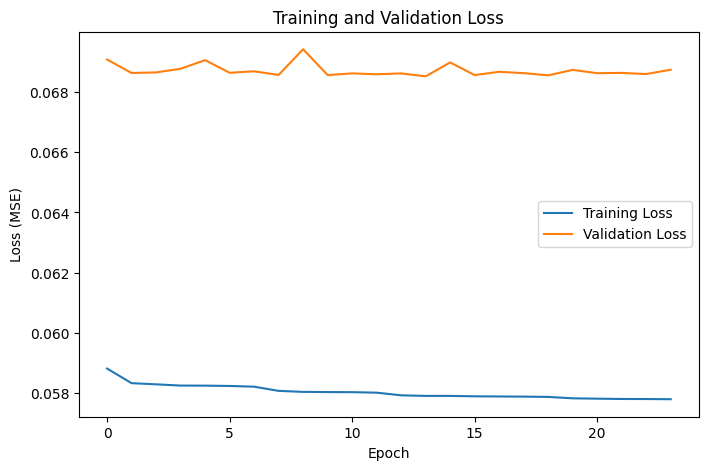

In [48]:
#chnages made
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Assuming X_train and y_train are your training data and labels
# and you have already performed the train-test split

# Standardize features to speed up convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Use the same scaler for validation data


# Build a neural network model for regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input shape specified here
    Dense(32, activation='relu'),
    Dense(1)  # Single neuron for regression output
])

# Compile the model using the Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


# Define callbacks for enhanced training control
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_ckpt = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model, reserving 10% of the training data for validation
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_val_scaled, y_val),  # Validation data provided here
                    callbacks=[early_stop, model_ckpt, reduce_lr])
                    # callbacks=[model_ckpt, reduce_lr])

# Plot training & validation lossH
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [49]:
# prompt: import and train random forest model

from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, y_train, X_val, and y_val are already defined

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model (example using R-squared)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf}")

# You can also use other metrics like Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest R-squared: -0.030617631272426005
Random Forest MSE: 0.07160440152998486


# Final Predictions and Submission Preparation


In [50]:
# # Add predicted default probability as a new feature
# # Assuming X_l is the DataFrame you want to use for prediction
# # and it needs to be scaled

# from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported


# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_l_scaled = scaler.fit_transform(test_data)  # Fit and transform

# # Convert the scaled data back into a DataFrame for easier handling
# X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=test_data.columns)

# # Now you can use X_l_scaled_df for prediction
# test_data['return'] = lr_model.predict(test_data)

# # Save processed dataset
# # test_data.to_csv("processed_loan_data.csv", index=False)
# print("Processed dataset saved with predicted default probabilities.")

In [61]:
# # logistic regression
# # Add predicted default probability as a new feature
# # Assuming X_l is the DataFrame you want to use for prediction
# # and it needs to be scaled

# from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported

# # Select the features you want to use for prediction (same as in training)
# X_lin = test_data.drop(columns=['return'], errors='ignore')  # Drop 'return' if it exists

# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_l_scaled = scaler.fit_transform(X_lin)  # Fit and transform

# # Convert the scaled data back into a DataFrame for easier handling
# # Ensure the columns match the original training data
# X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=X_lin.columns)

# # Assuming X_l_train is the DataFrame used for training the model
# training_features = X_l_train.columns

# # Select only the columns used during training
# X_l_scaled_df = X_l_scaled_df[training_features]

# # Now you can use X_l_scaled_df for prediction
# test_data['return'] = logreg_model.predict(X_l_scaled_df)  # Use X_l_scaled_df

# # Save processed dataset
# # test_data.to_csv("processed_loan_data.csv", index=False)
# print("Processed dataset saved with predicted default probabilities.")

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume test_data is your DataFrame for prediction.
# Remove the target column if it exists, so we only have features.
if 'return' in test_data.columns:
    test_features = test_data.drop(['return'], axis=1)
else:
    test_features = test_data.copy()

# Optional: Verify that the columns match what was used in training.
# Training features were likely: set(data.columns) - {'loan_status', 'return'}
expected_features = set(data.columns) - {'loan_status', 'return'}
print("Expected features:", expected_features)
print("Test data features:", set(test_features.columns))

# Scale the test features.
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(test_features)

# Convert the scaled array back to a DataFrame, preserving the feature names.
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_features.columns)

# Use your neural network model to predict returns.
# The model should output an array of shape (n_samples, 1). We flatten it to match.
test_data['return'] = model.predict(X_test_scaled_df).flatten()

# Optionally, save the processed dataset.
# test_data.to_csv("processed_loan_data.csv", index=False)
print("Processed dataset saved with predicted return values from the neural network.")


Expected features: {'dti', 'loan_amnt', 'revol_util', 'fico_range_high', 'open_acc', 'int_rate', 'pub_rec_bankruptcies', 'fico_avg', 'revol_bal', 'addr_state', 'funded_amnt', 'home_ownership', 'installment', 'mths_since_last_delinq', 'tax_liens', 'fico_range_low', 'sub_grade', 'emp_length', 'annual_inc', 'collections_12_mths_ex_med', 'grade', 'loan_amnt_squared', 'delinq_2yrs', 'pub_rec', 'chargeoff_within_12_mths', 'delinq_amnt', 'inq_last_6mths', 'year', 'acc_now_delinq', 'total_acc', 'verification_status'}
Test data features: {'dti', 'loan_amnt', 'revol_util', 'fico_range_high', 'open_acc', 'int_rate', 'pub_rec_bankruptcies', 'fico_avg', 'revol_bal', 'addr_state', 'funded_amnt', 'home_ownership', 'installment', 'mths_since_last_delinq', 'tax_liens', 'fico_range_low', 'sub_grade', 'emp_length', 'annual_inc', 'collections_12_mths_ex_med', 'grade', 'loan_amnt_squared', 'delinq_2yrs', 'pub_rec', 'chargeoff_within_12_mths', 'delinq_amnt', 'inq_last_6mths', 'year', 'acc_now_delinq', 'tota

In [53]:
# # Add predicted default probability as a new feature
# # Assuming X_l is the DataFrame you want to use for prediction
# # and it needs to be scaled

# from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported


# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_l_scaled = scaler.fit_transform(test_data)  # Fit and transform

# # Convert the scaled data back into a DataFrame for easier handling
# X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=test_data.columns)

# # Now you can use X_l_scaled_df for prediction
# test_data['return'] = rf_model.predict(X_l_scaled_df)

# # Save processed dataset
# # test_data.to_csv("processed_loan_data.csv", index=False)
# # print("Processed dataset saved with predicted default probabilities.")

In [55]:
set(data.columns)-set(test_data.columns)

{'loan_status'}

In [56]:
test_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'fico_avg',
       'loan_amnt_squared', 'return'],
      dtype='object')

In [57]:
# Rename and keep only the 'return' column as a DataFrame
# test_data_submission = test_data.rename(columns={'loan_default_prob': 'return'})[['return']]
test_data_submission = test_data[['return']]

# Insert an 'id' column starting from 1
test_data_submission.insert(0, 'id', range(1, len(test_data_submission) + 1))

# Save to CSV
test_data_submission.to_csv('submission_test.csv', index=False)

#Changes from assignment 2



1.   USE median for mths_since_last_delinq for missing vlaues



#Neual Networking and Random forcast

performed a neural network and Random forcast and i chosse neural newrok for the submition file.

